<a href="https://colab.research.google.com/github/AstroNoodles/Mini-Projects/blob/master/Iris_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>The Iris Dataset </h1>
 The Iris dataset, which can be found <a href="https://archive.ics.uci.edu/ml/datasets/iris">here</a> is one of the most famous and introductory datasets in machine learning and data science. Modeled after <a href="https://rdcu.be/biTg0"> Fisher's experiment </a> done in 1936, it was collected to model the differences in the sepal length and width and pedal length and width of three different Iris species: <i> Iris setosa, Iris Virginica </i> and <i> Iris Versicolor. </i> 
 Various machine learning projects use this as a way to teach beginners about simple algorithms and how to use their data science skills efficiently. 

---

The goal of this Collaboratory is to attempt to use my current skills of data exploration, wrangling and machine learning to predict the given flower species given the sepal length, petal length, sepal width and petal width in cm for each species.. Therefore, this is a <b> classification </b> problem, rather than a regression or clustering one. 


* We will measure the accuracy of the machine learning models using scikit-learn's classification report to get the **precision, recall and F1 scores** since it is classification to see which models perform the best in the dataset.

<br>

---
# Pictures

![Picture of the Petal and Sepal](http://mirlab.org/jang/books/dcpr/image/iris.gif =200x200)
<br>
Picture of the Petal and Sepal

![Iris Setosa](http://mirlab.org/jang/books/dcpr/image/Iris-setosa-10_1.jpg =200x200)
<br>
*Iris Setosa*

![Iris Virignica](http://mirlab.org/jang/books/dcpr/image/Iris-versicolor-21_1.jpg =200x200)
<br>
*Iris Virginica*

![Iris Versicolor](http://mirlab.org/jang/books/dcpr/image/Iris-virginica-3_1.jpg =200x200)
<br>
*Iris Versicolor*



First, we need to import the modules from scikit-learn and then we can grab our data and start the data preprocessing!

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from scipy.stats import randint

# Models
from sklearn.svm import SVC # Support Vector Classifier
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.naive_bayes import GaussianNB # Naive Bayes
from sklearn.linear_model import LogisticRegression # Logistic Regression (NOT FOR REGRESSION)
from sklearn.neural_network import MLPClassifier # Perceptron

import os.path
import os

%matplotlib inline

print("All set up!")

All set up!


In [23]:
data = load_iris()
print(f"Feature Names: {data.feature_names}.")
print(f"Target Names: {data.target_names}.")

Feature Names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'].
Target Names: ['setosa' 'versicolor' 'virginica'].


In [24]:
len(data.data)

150

In [25]:
print("Data: ")
print(data.data[:5])
print("Target: ")
print(data.target[:5])


Data: 
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Target: 
[0 0 0 0 0]


With no data preprocessing needed, we can test some random classification models to see which do the best and send them to some files to record for later.

In [26]:
train_x, test_x, train_y, test_y = train_test_split(data.data, data.target, test_size=.2, random_state=4)
models = [SVC(gamma='auto'), 
          RandomForestClassifier(n_estimators=1000), 
          MLPClassifier(), 
          DecisionTreeClassifier(), 
          GaussianNB(), 
          LogisticRegression(solver='lbfgs', multi_class='auto')]

if not os.path.exists("reports"):
  os.mkdir('reports')

for model in models:
  model_name = type(model).__name__
  model.fit(train_x, train_y)
  predict_y = model.predict(test_x)
  report = classification_report(test_y, predict_y, target_names=data.target_names)
  
  print(model_name)
  print(report)
  
  with open(os.path.join('reports', f"{model_name}_iris.txt"), 'w') as f:
    f.write(report)
    
print('All reports written to file!')


SVC
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      0.80      0.89         5
   virginica       0.90      1.00      0.95         9

   micro avg       0.97      0.97      0.97        30
   macro avg       0.97      0.93      0.95        30
weighted avg       0.97      0.97      0.97        30

RandomForestClassifier
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      0.80      0.89         5
   virginica       0.90      1.00      0.95         9

   micro avg       0.97      0.97      0.97        30
   macro avg       0.97      0.93      0.95        30
weighted avg       0.97      0.97      0.97        30

MLPClassifier
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      0.80      0.89         5
   virginica       0.90      1.00 

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


# Preliminary Results 

From the dataset, we can see the results in the text files for the best classical models that can model the Iris dataset. Though grid search was not done to find optimal parameters, the best models that seemed to work for Iris prediction were:


*   Decision Trees (97%)
*   Logistic Regression (97%)
*   SVC (97%)
*   Random Forest (97%)

Suprisingly, the multi layer perceptron and naive bayes were not particularly strong with this dataset. Perhaps, the learning rate and solver should be adjusted to deal with this problem as well as checking the correlation between the variables (naive bayes assumes the data is independent)

However, this does not mean that the MLP and Naive Bayes are the worst classical machine learning algorithms to deal with this classification problem. Instead, grid search should be done to find better parameters to see what triggers it to work well and reach 97% accuracy like the others.






# Optimization

## Grid Search

Let's try to optimize with randomized grid search first with the MLP to see if we can get any performance improvements compared to its default performance.

In [27]:
mlp_classifier = MLPClassifier()
print(mlp_classifier)

# To do randomized grid search, we need the kwargs for the search to look through.
# See https://bit.ly/2CjDug7 for all the kwargs
mlp_params = {"activation": ['identity', 'logistic', 'tanh', 'relu'],
              "solver" : ["lbfgs", "sgd", "adam"],
              "learning_rate": ["constant", "invscaling", "adaptive"],
              "max_iter" : randint(100, 400),
              "shuffle": [True, False]}

random_search = RandomizedSearchCV(mlp_classifier, mlp_params, n_iter=20, 
                                   scoring="accuracy", cv=5, verbose=0)
random_search.fit(train_x, train_y)

# Select the best params and update them to the MLP.
best_mlp_params = random_search.best_params_
mlp_classifier.__dict__.update(best_mlp_params)
print(mlp_classifier)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (215) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (215) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (215) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (215) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=275, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=False, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (275) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [28]:
# Trying out the newly grid searched MLP with specially chosen params
mlp_classifier.fit(train_x, train_y)
predict_y = model.predict(test_x)
report = classification_report(test_y, predict_y, target_names=data.target_names)

print(report)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      0.80      0.89         5
   virginica       0.90      1.00      0.95         9

   micro avg       0.97      0.97      0.97        30
   macro avg       0.97      0.93      0.95        30
weighted avg       0.97      0.97      0.97        30



/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (275) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Though it didn't make much of a difference, let's do a correlation test to see if there are dependent variables in the data that ruin Naive Bayes.

In [29]:
print(data.feature_names) # Print the features

# np.corrcoef prints a correlation matrix of a numpy array, 
# rowvar=False tells numpy that each column is a feature rather than the row!

print(np.corrcoef(train_x, rowvar=False)) 
print()
print(np.corrcoef(train_x, rowvar=False))


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[ 1.         -0.09663434  0.86953201  0.81095724]
 [-0.09663434  1.         -0.39701304 -0.3198639 ]
 [ 0.86953201 -0.39701304  1.          0.95807717]
 [ 0.81095724 -0.3198639   0.95807717  1.        ]]

[[ 1.         -0.09663434  0.86953201  0.81095724]
 [-0.09663434  1.         -0.39701304 -0.3198639 ]
 [ 0.86953201 -0.39701304  1.          0.95807717]
 [ 0.81095724 -0.3198639   0.95807717  1.        ]]


As we can see from numpy's correlation matrix on the train and test data, there may be some correlation between the petal and sepal lengths from their close *R* values, so this might explain why Naive Bayes performs suboptimally. 





## Cross-validation

To ensure that our classification scores are valid from our classification reports via the testing and training sets, I can also employ cross-validation in order to risk overfitting on the testing set. This might be best when I have sparser data or when the classification report really shows overfitting, but let's see if it has an effect or not.

Here's a visual of the procedure:

![Cross-Validation from sk-learn](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png =350x300)

In [38]:
from sklearn.model_selection import cross_val_score

# First, let's insert the new MLP perceptron into the models list I had previously
models.append(mlp_classifier)

for model in models:
  model_name = type(model).__name__
  
  cross_val_scores = cross_val_score(model, data.data, data.target, cv=5, n_jobs=-1)
  accuracy_str = f"{model_name}: {cross_val_scores.mean():.2f} (+/- {(cross_val_scores.std() * 2):.2f})"
  desc_str = "Scores are given in terms of the mean and twice the standard deviation"
  
  print(accuracy_str)
  print(desc_str)
  
  with open(os.path.join('reports', f"{model_name}_iris.txt"), 'a') as f:
    f.write(accuracy_str)
    f.write(desc_str)

Cross-Validation Report:
Model Name 	 Mean Score 	 2SD

SVC: 0.98 (+/- 0.03)
RandomForestClassifier: 0.97 (+/- 0.04)
MLPClassifier: 0.97 (+/- 0.07)
DecisionTreeClassifier: 0.96 (+/- 0.07)
GaussianNB: 0.95 (+/- 0.05)
LogisticRegression: 0.97 (+/- 0.05)
MLPClassifier: 0.99 (+/- 0.03)
MLPClassifier: 0.98 (+/- 0.05)
MLPClassifier: 0.98 (+/- 0.05)
MLPClassifier: 0.98 (+/- 0.05)
MLPClassifier: 0.98 (+/- 0.05)
MLPClassifier: 0.98 (+/- 0.05)
MLPClassifier: 0.98 (+/- 0.05)


Overall, the cross-validation showed that the MLP Perceptron with 5 validation sets and the SVC performed the best with the Iris data. With the assumptions of the data that the lengths are correlated as the flowers grow, this would likely make sense.

With further adjustment and grid search of the values that work well for the SVC and MLP Classifier (not forgetting to include the 97% validation accuracies of Logistic Regression and Random Forest), a model might be able to get a 99% accuracy on the Iris dataset.

For now, though 98% is a resounding success!

# Visualization of the Dataset:

Text(0, 0.5, 'Petal Width (cm)')

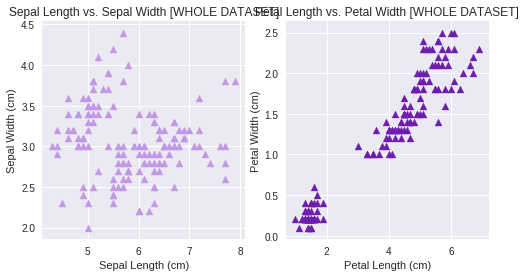

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax1, ax2 = ax

ax1.scatter(data.data[:, 0], data.data[:, 1], c='#c297e5', marker='^')
ax1.set_title("Sepal Length vs. Sepal Width [WHOLE DATASET]")
ax1.set_xlabel("Sepal Length (cm)")
ax1.set_ylabel("Sepal Width (cm)")

ax2.scatter(data.data[:, 2], data.data[:, 3], c='#6e1daf', marker='^')
ax2.set_title("Petal Length vs. Petal Width [WHOLE DATASET]")
ax2.set_xlabel("Petal Length (cm)")
ax2.set_ylabel("Petal Width (cm)")

Basic visualization on the dataset. The first graph gives the relationships between the petals and sepals on the whole dataset and the second individualizes them per species.

RED - Iris Setosa
BLUE - Iris Versicolor
GREEN - Iris Virginica


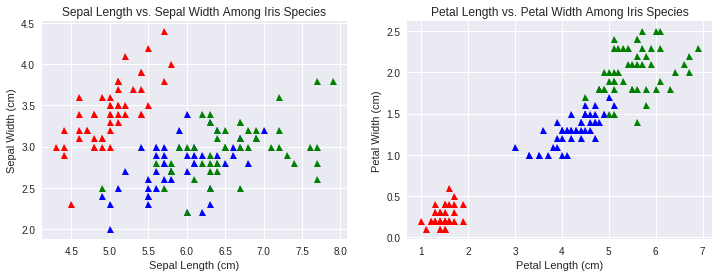

In [32]:
fig, axis = plt.subplots(1, 2, figsize=(12, 4))
ax1, ax2 = axis

for i, species in enumerate(data.target):
  if species == 0:
     ax1.plot(data.data[i, 0], data.data[i, 1], 'r^', label='setosa')
    
  elif species == 1:
    ax1.plot(data.data[i, 0], data.data[i, 1], 'b^', label='versicolor')
  else:
    ax1.plot(data.data[i, 0], data.data[i, 1], 'g^', label='virginica')
    

ax1.set_xlabel('Sepal Length (cm)')
ax1.set_ylabel('Sepal Width (cm)')
ax1.set_title('Sepal Length vs. Sepal Width Among Iris Species')

for i, species in enumerate(data.target):
  if species == 0:
    ax2.plot(data.data[i, 2], data.data[i, 3], 'r^', label='setosa')
    
  elif species == 1:
    ax2.plot(data.data[i, 2], data.data[i, 3], 'b^', label='versicolor')
  else:
    ax2.plot(data.data[i, 2], data.data[i, 3], 'g^', label='virginica')
ax2.set_xlabel('Petal Length (cm)')
ax2.set_ylabel('Petal Width (cm)')
ax2.set_title('Petal Length vs. Petal Width Among Iris Species')

# TODO - fix so the legend works
print('RED - Iris Setosa')
print('BLUE - Iris Versicolor')
print('GREEN - Iris Virginica')

# Summary

Overall, this notebook summarized how different classical machine models could be used to predict the three different species of *Iris* flowers given their petal length and width and sepal length and width. 

Though no exact hammer fits into the many algorithmic nails I could have used, this introductory foray into the Iris dataset shows the importance of looking for optimization and trying to increase the performance on this classical dataset.

In the future, I might look into more advanced datasets or other performance measures not studied here to see their effect on either the regression or classification problem studied.

For now, <br>
** *Ciao* ** and thanks for reading!